In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\LENOVO\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\LENOVO\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
# create a date object
time_data = pd.date_range("2025-04-01",periods=1440, freq='T' )

C:\Users\LENOVO\AppData\Local\Temp/ipykernel_18668/794335167.py:2: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  time_data = pd.date_range("2025-04-01",periods=1440, freq='T' )


In [3]:
# generate sensor data
np.random.seed(42)
temp_data = 25 + np.sin(np.linspace(0,3.14,1440))*4 + np.random.normal(0,0.5,1440)
humidity_data = 50 + np.cos(np.linspace(0,3.14,1440))*5+ np.random.normal(0,1,1440)
light_data = 400 + np.sin(np.linspace(0,6.28,1440))*100 + np.random.normal(0,10,1440)

In [4]:
temp_data

array([25.24835708, 24.93959613, 25.34130078, ..., 25.82749983,
       25.26058634, 25.3738095 ])

In [5]:
humidity_data

array([55.66288127, 56.17346195, 55.18097394, ..., 44.33230915,
       45.29222835, 44.81267732])

In [7]:
light_data

array([377.61768767, 379.22941126, 394.80416549, ..., 410.08775904,
       400.78999893, 396.31594392])

In [8]:
# create a data frame
df = pd.DataFrame({"time":time_data,"temp":temp_data,"humidity":humidity_data,"light":light_data})

In [9]:
df

,time,temp,humidity,light
0,2025-04-01 00:00:00,25.248357,55.662881,377.617688
1,2025-04-01 00:01:00,24.939596,56.173462,379.229411
2,2025-04-01 00:02:00,25.341301,55.180974,394.804165
3,2025-04-01 00:03:00,25.787700,53.703061,405.886071
4,2025-04-01 00:04:00,24.917836,55.399497,374.270520
...,...,...,...,...
1435,2025-04-01 23:55:00,25.182573,44.090583,407.995204
1436,2025-04-01 23:56:00,24.908210,44.063659,387.097338
1437,2025-04-01 23:57:00,25.827500,44.332309,410.087759
1438,2025-04-01 23:58:00,25.260586,45.292228,400.789999


In [10]:
df.set_index("time", inplace=True)

In [12]:
df

,temp,humidity,light
time,,,
2025-04-01 00:00:00,25.248357,55.662881,377.617688
2025-04-01 00:01:00,24.939596,56.173462,379.229411
2025-04-01 00:02:00,25.341301,55.180974,394.804165
2025-04-01 00:03:00,25.787700,53.703061,405.886071
2025-04-01 00:04:00,24.917836,55.399497,374.270520
...,...,...,...
2025-04-01 23:55:00,25.182573,44.090583,407.995204
2025-04-01 23:56:00,24.908210,44.063659,387.097338
2025-04-01 23:57:00,25.827500,44.332309,410.087759


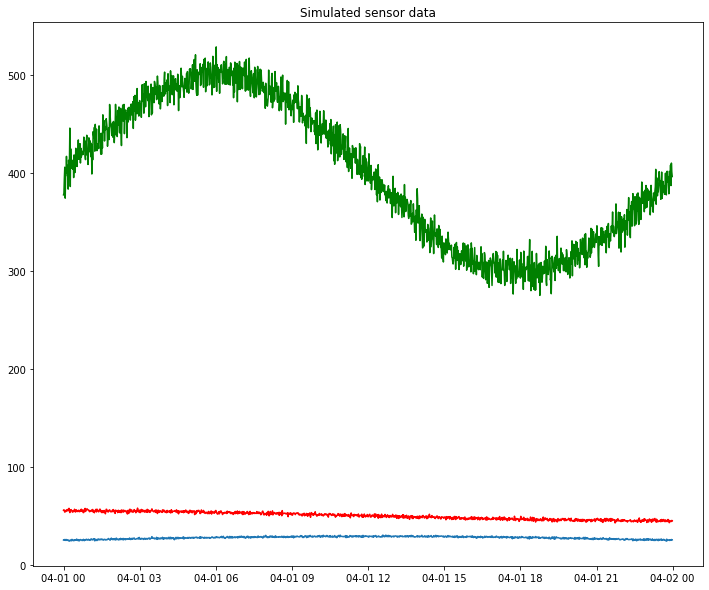

In [14]:
# plot sensor values against time
plt.figure(figsize=(12,10))
plt.title("Simulated sensor data")
plt.plot(df.index, df['temp'],label='Temperature')
plt.plot(df.index, df['humidity'], color='red')
plt.plot(df.index, df['light'], color = 'green')

In [16]:
# rolling means: smoothening data and learning short term trends
df['temp_rolling'] = df['temp'].rolling(window=5).mean()
df['humidity_rolling'] = df['humidity'].rolling(window=5).mean()
df['light_rolling']= df['light'].rolling(window=5).mean()

In [17]:
df

,temp,humidity,light,temp_rolling,humidity_rolling,light_rolling
time,,,,,,
2025-04-01 00:00:00,25.248357,55.662881,377.617688,NaN,NaN,NaN
2025-04-01 00:01:00,24.939596,56.173462,379.229411,NaN,NaN,NaN
2025-04-01 00:02:00,25.341301,55.180974,394.804165,NaN,NaN,NaN
2025-04-01 00:03:00,25.787700,53.703061,405.886071,NaN,NaN,NaN
2025-04-01 00:04:00,24.917836,55.399497,374.270520,25.246958,55.223975,386.361571
...,...,...,...,...,...,...
2025-04-01 23:55:00,25.182573,44.090583,407.995204,25.179597,44.369763,396.521561
2025-04-01 23:56:00,24.908210,44.063659,387.097338,25.064427,44.090636,398.194228
2025-04-01 23:57:00,25.827500,44.332309,410.087759,25.130386,44.374361,399.896926


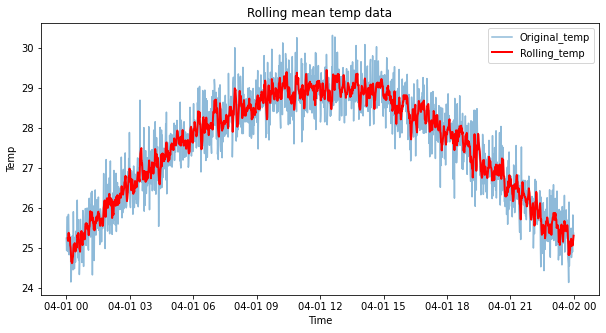

In [18]:
# plotting data
plt.figure(figsize=(10,5))
plt.plot(df.index, df['temp'], label= 'Original_temp',alpha=0.5)
plt.plot(df.index,df['temp_rolling'], label='Rolling_temp',linewidth=2, color='red')
plt.xlabel('Time')
plt.ylabel('Temp')
plt.title('Rolling mean temp data')
plt.legend()
plt.show()

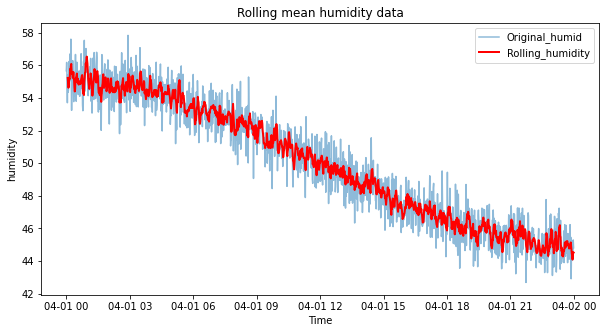

In [19]:
# plotting data
plt.figure(figsize=(10,5))
plt.plot(df.index, df['humidity'], label= 'Original_humid',alpha=0.5)
plt.plot(df.index,df['humidity_rolling'], label='Rolling_humidity',linewidth=2, color='red')
plt.xlabel('Time')
plt.ylabel('humidity')
plt.title('Rolling mean humidity data')
plt.legend()
plt.show()

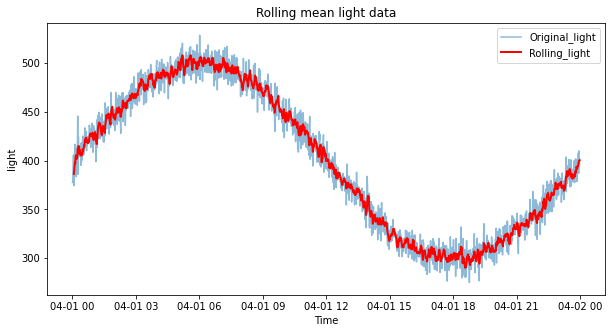

In [20]:
# plotting data
plt.figure(figsize=(10,5))
plt.plot(df.index, df['light'], label= 'Original_light',alpha=0.5)
plt.plot(df.index,df['light_rolling'], label='Rolling_light',linewidth=2, color='red')
plt.xlabel('Time')
plt.ylabel('light')
plt.title('Rolling mean light data')
plt.legend()
plt.show()

In [18]:
# anomoly detection 
df['temp_rolling'] = df['temp'].rolling(window=5).mean()
df['temp_std']=df['temp'].rolling(window=5).std()

df['humidity_rolling'] = df['humidity'].rolling(window=5).mean()
df['humidity_std'] = df['humidity'].rolling(window=5).std()

In [19]:
# define upper and lower ranges
df['upper_range'] = df['temp_rolling']+3*df['temp_std']
df['lower_range'] = df['temp_rolling']-3*df['temp_std']

df['h_upper_range'] = df['humidity_rolling']+3*df['humidity_std']
df['h_lower_range'] = df['humidity_rolling']-3*df['humidity_std']


In [20]:
# mark anomolies
df['temp_anomaly']= (df['temp']>df['upper_range'])|(df['temp']<df['lower_range'])
df['humidity_anomaly']= (df['humidity']>df['h_upper_range'])|(df['humidity']<df['h_lower_range'])

In [21]:
df

,temp,humidity,light,temp_rolling,humidity_rolling,light_rolling,temp_std,humidity_std,upper_range,lower_range,h_upper_range,h_lower_range,temp_anomaly,humidity_anomaly
time,,,,,,,,,,,,,,
2025-04-01 00:00:00,25.248357,55.662881,377.617688,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False
2025-04-01 00:01:00,24.939596,56.173462,379.229411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False
2025-04-01 00:02:00,25.341301,55.180974,394.804165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False
2025-04-01 00:03:00,25.787700,53.703061,405.886071,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False
2025-04-01 00:04:00,24.917836,55.399497,374.270520,25.246958,55.223975,386.361571,0.354999,0.927362,26.311954,24.181962,58.006061,52.441889,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-01 23:55:00,25.182573,44.090583,407.995204,25.179597,44.369763,396.521561,0.319922,0.967832,26.139364,24.219830,47.273260,41.466266,False,False
2025-04-01 23:56:00,24.908210,44.063659,387.097338,25.064427,44.090636,398.194228,0.284620,0.752306,25.918286,24.210568,46.347555,41.833716,False,False
2025-04-01 23:57:00,25.827500,44.332309,410.087759,25.130386,44.374361,399.896926,0.417383,0.365565,26.382534,23.878238,45.471056,43.277665,False,False
